# Лебединский Илья Владимирович 381908-3 
### Зачетное задание №4.

## Численное интегрирование. Светимость черного тела
1.Построить для Солнца график зависимости 𝜑(𝜆,𝑇) от 𝜆.

2.Вычислить светимость Солнца на видимой области длин волн.

3.Вычислить светимость Солнца для всех длин волн.

4.Найти светимость Солнца с помощью закона Стефана - Больцмана.

5.Найти солнечную постоянную.

6.Результаты сравнить с данными из литературы.

7.Сделать выводы.

## 1.График зависимости 𝜑(𝜆,𝑇) от 𝜆

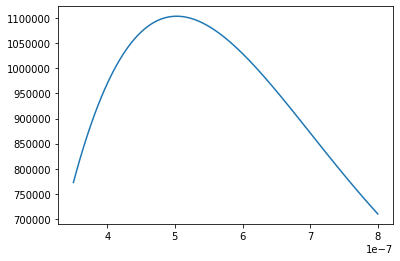

In [54]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
import math as math
from scipy.integrate import quad, dblquad, tplquad
%matplotlib inline
from scipy import linalg
from scipy import integrate

# Значение лямбды
lyambda = np.array([3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])*10**(-7)

# Значение 𝜑
mass = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(10):
    mass[i] = ((8*np.pi*sc.h*sc.c)/lyambda[i]**5) * (1/(math.exp(((sc.h*sc.c)/(lyambda[i]*sc.k*5778)))-1))

f = np.polyfit(lyambda, mass, 4)
x = np.linspace(lyambda[0], lyambda[9], 100)
y = np.polyval(f, x)
plt.plot(x, y,)
pass


## 2. Cветимость Солнца на видимой области длин волн

 С помощью численного интегрирования найдем светимость Солнца на видимой области длин волн, т.\,е. для $\lambda$ в диапазоне от $\lambda_1 = 3.5\times 10^{-7}$ до $\lambda_2 = 7\times 10^{-7}$.

необходимо найти интеграл
                                            $$
R(\lambda_1,\lambda_2,T) = \int_{\lambda_1}^{\lambda_2} \varphi(\lambda, T) d\lambda.
$$

In [55]:
h = 6.6261*10**-34
a = 3.5 * (10**(-7))
b = 7 * (10**(-7))
n = 100
H = (b - a)/n
x = np.arange(a + H/2, b, H)
y = (2*np.pi*h*sc.c**2)/((x**5)*((np.e**((h*c)/(x*sc.k*T))-1)))
I_rect = H*sum(y)
I_rect

26416045.207762517

In [56]:
I_trapz = integrate.trapz(y, x)
I_trapz

26199157.459464908

In [57]:
I_simps = integrate.simps(y, x)
I_simps

26199634.676830918

## 3. Находим светимость Солнца для всех длин волн через несобственный интеграл

In [58]:
T=5776
s1,q = quad(lambda x: x**3/(np.exp(x)-1), 0, np.inf)
s2 = sc.k**4/(4*sc.pi**2*sc.c**2*sc.hbar**3)*T**4*(6.07877*10**18)*s1
print("Светимость Солнца: ", s2)

Светимость Солнца:  3.836508690909489e+26


## 4. Находим светимость солнца, используя постоянную Стефана-Больцмана

In [59]:
Rs = 6.957 * 10**8  
const_S_B = 2*(np.pi**5)*(sc.k**4)/(15*(sc.c**2)*(sc.h**3))
R = const_S_B * T**4 
ans = R*4*np.pi*Rs**2
print("Светимость Солнца для всех длин волн = ", ans)

Светимость Солнца для всех длин волн =  3.8386131401239756e+26


## 5. Солнечная постоянная

In [60]:
Sun_const = ((5.67*(10**(-8)))*(5778**4)*(6.9599*(10**8))**2)/((1.49598*(10**11))**2)
print("Солнечная постоянная = ", Sun_const)

Солнечная постоянная =  1367.8788465865166


## Итоги:
В ходе работы были получены следующие величины:

Светимость Солнца на видимой области длин волн состовляет $26199634$ (Вт)

Светимость Солнца найденная с помощью несобстевнного интеграла: 3.827 * 10^26 (Вт).

Светимость Солнца найденная с помощью закона Стефана-Больцмана: 3.843 * 10^26 (Вт).

Солнечная постоянная - $1367.8788$

## Вывод.

С учетом погрешности вычисленные результаты совпадают с результатами из литературы.

Солнечная постоянная, по данным википедии составляет 1367 Вт/м^2.
Солнечная постоянная совпадает с данными на википедии.

Cветимость Солнца найденная с помощью несобственного интеграла $3.8 \times 10^{26}$ Вт, что соответствует данными из литературы.

Светимость Солнца найденная с помощью закона Стефана-Больцмана $3.8 \times 10^{26}$ Вт, что тоже соответствует данными из литературы.

Данные о светимости Солнца на видимой области длин волн найти не удалось.

Можно сделать выводы, что полученные значение сходится с табличными.